✅ Dataset loaded successfully!

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   sal

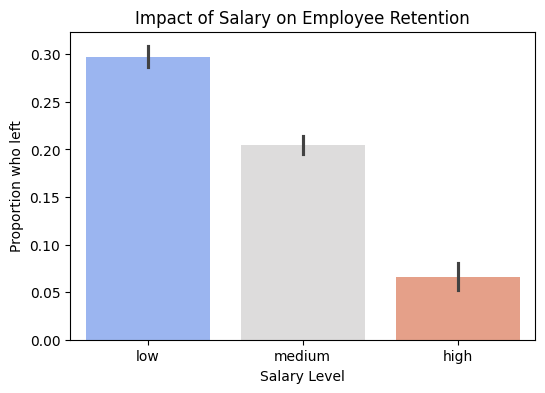

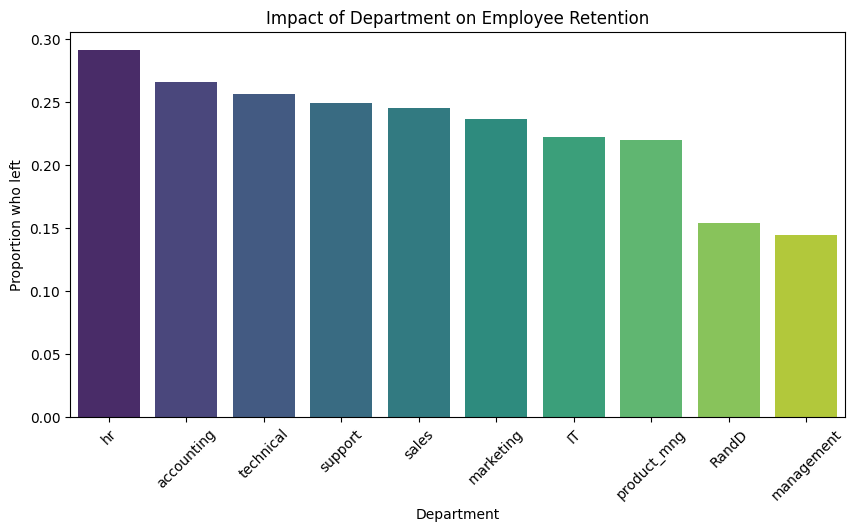


✅ Model Accuracy: 75.83%

🎯 Top Correlations with Leaving (left):
left                    1.000000
time_spend_company      0.144822
average_montly_hours    0.071287
number_project          0.023787
last_evaluation         0.006567
Name: left, dtype: float64


In [5]:
#  Employee Retention Prediction using Logistic Regression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


df = pd.read_csv("HR_comma_sep.csv")
print(" Dataset loaded successfully!\n")
print(df.head())

# Exploratory Data Analysis (EDA)
print("\n Basic Information:")
print(df.info())


print("\n Correlation with Employee Retention (left):")
corr = df.select_dtypes(include='number').corr()['left'].sort_values(ascending=False)
print(corr)

#  Impact of Salary on Retention
plt.figure(figsize=(6,4))
sns.barplot(
    x='salary', y='left', hue='salary',
    data=df, order=['low', 'medium', 'high'],
    palette='coolwarm', legend=False
)
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Proportion who left")
plt.show()

#  Impact of Department on Retention
dept_col = None
for col in df.columns:
    if col.lower() in ['sales', 'department']:
        dept_col = col
        break

if dept_col:
    plt.figure(figsize=(10,5))
    dept_retention = df.groupby(dept_col)['left'].mean().sort_values(ascending=False)
    sns.barplot(
        x=dept_retention.index, y=dept_retention.values,
        hue=dept_retention.index, palette='viridis', legend=False
    )
    plt.title("Impact of Department on Employee Retention")
    plt.xlabel("Department")
    plt.ylabel("Proportion who left")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(" No department or sales column found in dataset!")

#  Build Logistic Regression Model
X = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']].copy()
y = df['left']


label_encoder = LabelEncoder()
X['salary'] = label_encoder.fit_transform(X['salary'])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Measure Model Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy * 100:.2f}%")


print("\n Top Correlations with Leaving (left):")
print(corr.head(5))
